# Machine Learning Assignment Notebook

### Exploratory Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Reading the data
df = pd.read_csv('data.csv')

In [3]:
# Checking the first five
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [4]:
# Checking the shape of the dataset
df.shape

(23775, 17)

Observation: the dataset has 23775 rows and 17 columns

In [5]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23775 entries, 0 to 23774
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AltitudeVariation          23775 non-null  float64
 1   VehicleSpeedInstantaneous  23766 non-null  float64
 2   VehicleSpeedAverage        23775 non-null  float64
 3   VehicleSpeedVariance       23775 non-null  float64
 4   VehicleSpeedVariation      23775 non-null  float64
 5   LongitudinalAcceleration   23775 non-null  float64
 6   EngineLoad                 23770 non-null  float64
 7   EngineCoolantTemperature   23770 non-null  float64
 8   ManifoldAbsolutePressure   23770 non-null  float64
 9   EngineRPM                  23770 non-null  float64
 10  MassAirFlow                23770 non-null  float64
 11  IntakeAirTemperature       23770 non-null  float64
 12  VerticalAcceleration       23775 non-null  float64
 13  FuelConsumptionAverage     23770 non-null  flo

Observation: 
- 14 of the columns are float datatype
- 3 of the columns are object datatype (categorical)

### Atributes Details:

14 Numeric Attributes:

- AltitudeVariation - altitude change calculated over 10 seconds
- VehicleSpeedInstantaneous - current speed value;
- VehicleSpeedAverage - average speed in the last 60 seconds;
- VehicleSpeedVariance - speed variance in the last 60 seconds;
- VehicleSpeedVariation - speed variation for every second of detection;
- LongitudinalAcceleration - measured by the smartphone accelerometer and pre-processed with a low-pass filter;
- EngineLoad - expressed as a percentage;
- EngineCoolantTemperature - in celsius degree;
- ManifoldAirPressure - (MAP), a parameter the internal combustion engine uses to compute the optimal air/fuel ratio;
- EngineRPM - Revolutions per Minute of the engine;
- MassAirFlow - (MAF) Rate measured in g/s, used by the engine to set fuel delivery and spark timing;
- IntakeAirTemperature - (IAT) at the engine entrance;
- VerticalAcceleration - measured by the smartphone accelerometer and pre-processed with a low-pass filter;
- AverageFuelConsumption - calculated as needed liters per 100 km.

3 Categorical Attributes

- roadSurface - 3 classes: SmoothCondition, FullOfHolesCondition, UnevenCondition;
- traffic - 3 classes: LowCongestionCondition, NormalCongestionCondition, HighCongestionCondition;
- drivingStyle - 2 classes: EvenPaceStyle, AggressiveStyle.

In [6]:
# Checking for missing values
df.isnull().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    9
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   5
EngineCoolantTemperature     5
ManifoldAbsolutePressure     5
EngineRPM                    5
MassAirFlow                  5
IntakeAirTemperature         5
VerticalAcceleration         0
FuelConsumptionAverage       5
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

Observation: 8 columns have missing data

In [7]:
# general statistic info:
df.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,23775.000000,23766.000000,23775.000000,23775.000000,23775.000000,23775.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23770.000000,23775.000000,23770.000000
mean,-0.263008,38.644538,38.811064,171.920888,-0.020554,0.681683,36.762356,70.818721,115.195120,1486.820257,16.045632,23.483004,0.463398,15.171096
std,2.091264,33.864438,31.149198,182.751192,2.475485,1.582911,26.640593,15.685020,20.455268,578.064539,9.692254,10.902487,3.462745,4.603774
min,-24.600006,0.000000,0.000000,0.000000,-103.500000,-3.065000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883
25%,-1.399996,11.700000,15.991532,46.048954,-0.900001,-0.219000,18.823530,63.000000,102.000000,854.000000,6.970000,16.000000,-0.554000,11.672288
50%,-0.099998,31.500000,29.314682,113.907731,0.000000,0.391000,31.372549,79.000000,107.000000,1485.000000,15.360000,19.000000,-0.078100,14.520122
75%,0.700001,54.899998,50.148162,230.200656,0.900002,1.159700,58.431374,81.000000,120.000000,1955.875000,21.717499,31.000000,0.237250,18.288337
max,11.400002,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861


# Data Cleaning

Handle the missing values using median since the missing values percentage is very low

In [8]:
for col in ["EngineLoad","VehicleSpeedInstantaneous","EngineCoolantTemperature","ManifoldAbsolutePressure","EngineRPM","MassAirFlow","IntakeAirTemperature","FuelConsumptionAverage"]:
    df[col] = df[col].fillna(df[col].median()) # for each comlumn replace all the missing values with median

In [9]:
# Checking for missing values again
df.isnull().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

Observation: no missing values

In [10]:
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [11]:
df['drivingStyle'].nunique()  # looking for unique values in the target column

2

Observation: we have 2 unique driving stylies

## Data Visualisation

### Distribution of Continuous Features by Driving Style (Barplots)

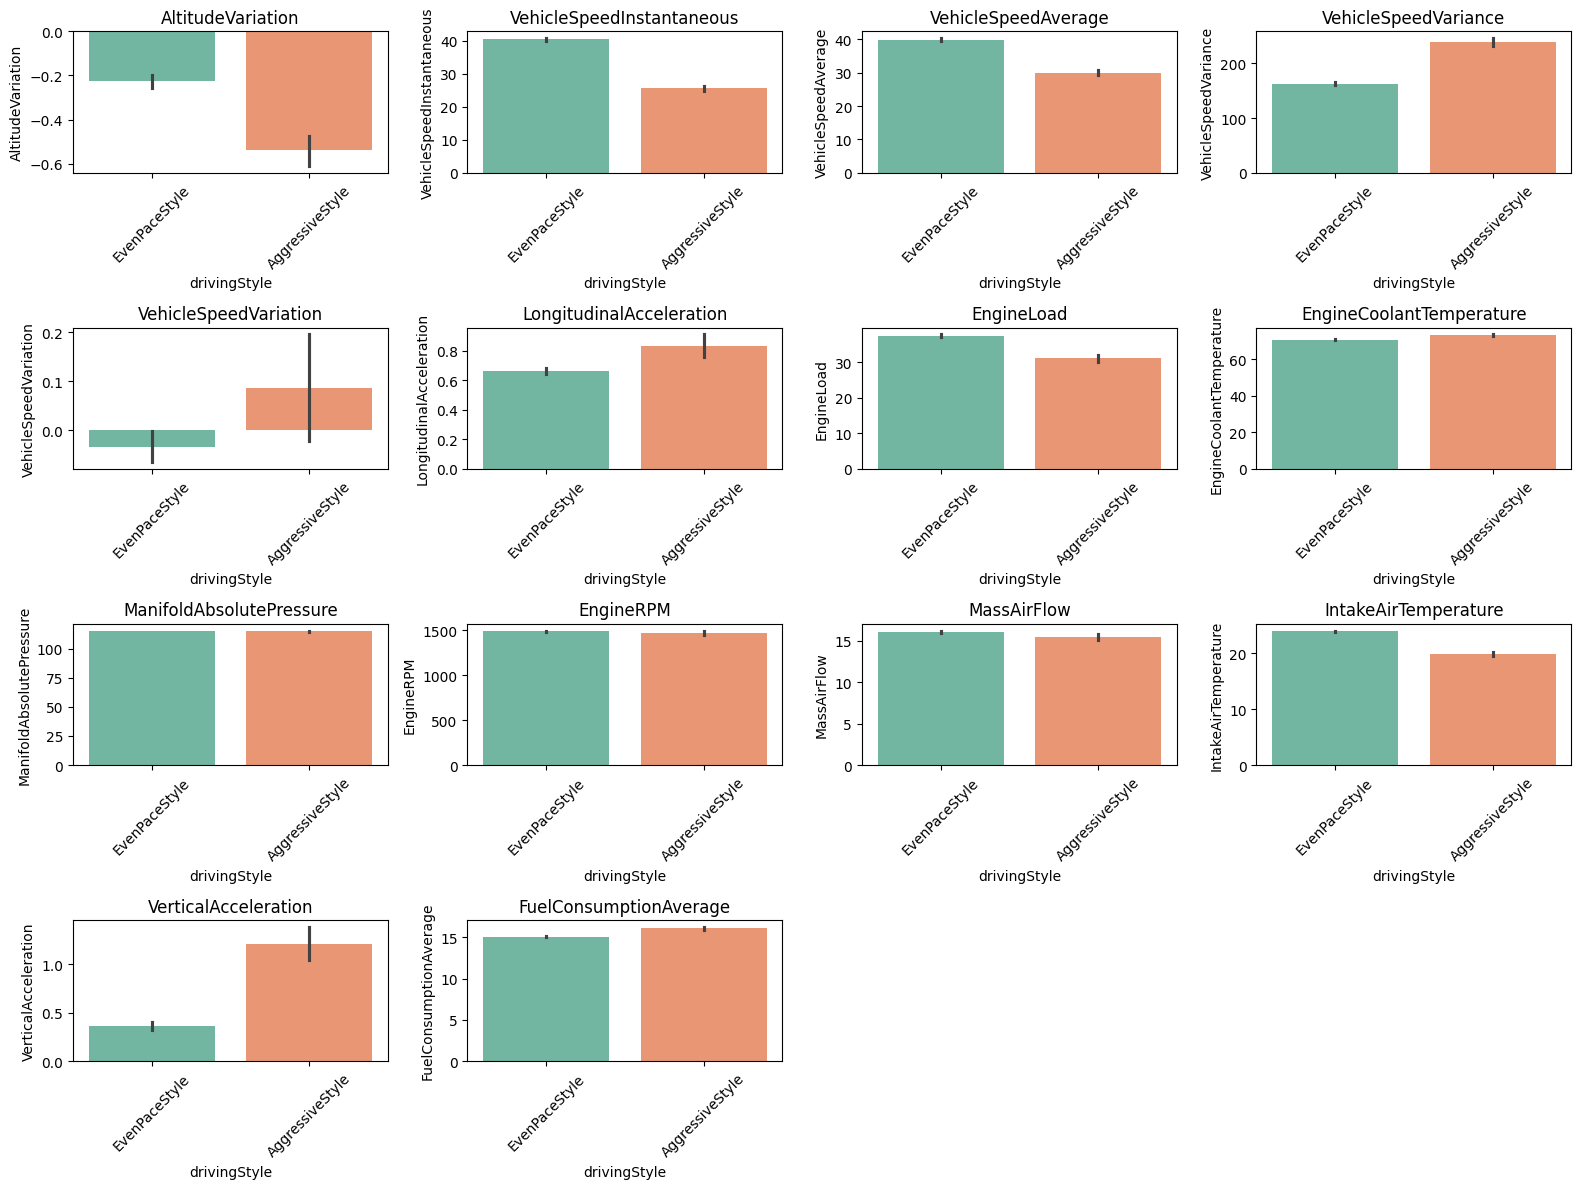

In [12]:
continuous_features = [
    'AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
    'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad',
    'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM',
    'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage'
]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(4, 4, i)
    sns.barplot(
        x='drivingStyle',
        y=feature,
        data=df,
        hue='drivingStyle',      
        palette='Set2',
        legend=False      
    )
    plt.xticks(rotation=45)
    plt.title(feature)

plt.tight_layout()
plt.show()


### Correlation Heatmap

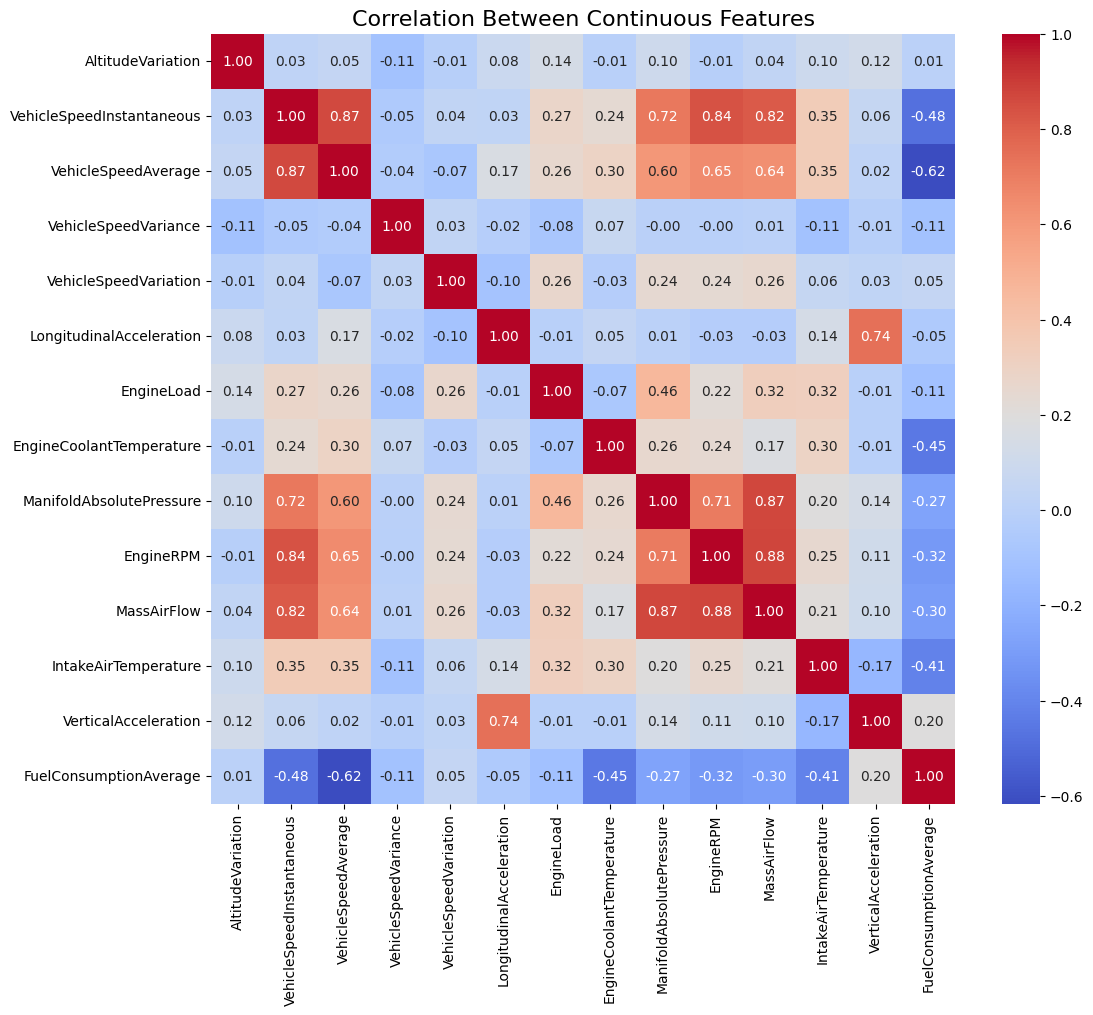

In [13]:
plt.figure(figsize=(12, 10))
corr = df[continuous_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Between Continuous Features', fontsize=16)
plt.show()

### Vehicle Speed vs Acceleration Colored by Driving Style (Scatter Plot)

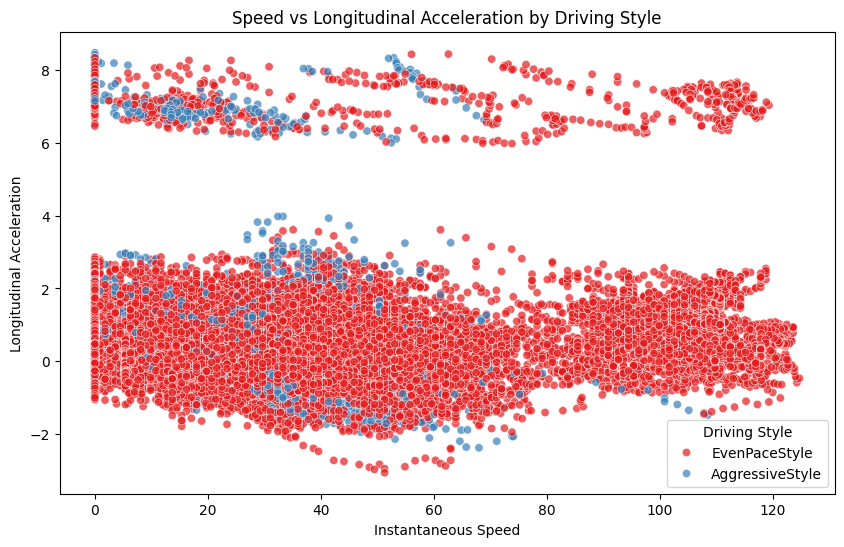

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='VehicleSpeedInstantaneous',
    y='LongitudinalAcceleration',
    hue='drivingStyle',
    palette='Set1',
    alpha=0.7
)
plt.title('Speed vs Longitudinal Acceleration by Driving Style')
plt.xlabel('Instantaneous Speed')
plt.ylabel('Longitudinal Acceleration')
plt.legend(title='Driving Style')
plt.show()

### Interactive Feature Comparison (Plotly)

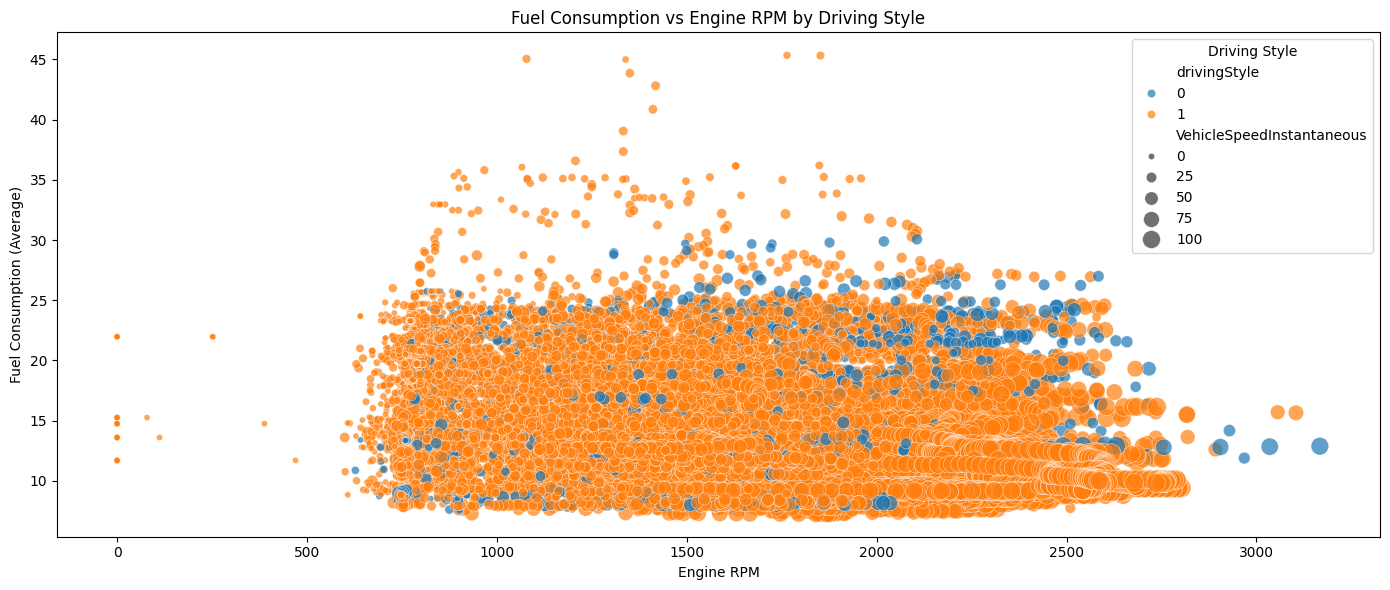

In [ ]:
# Fuel consumption vs Engine RPM by Driving Style Plot
plt.figure(figsize=(14, 6))  # wider plot
sns.scatterplot(
    data=df,
    x='EngineRPM',
    y='FuelConsumptionAverage',
    hue='drivingStyle',
    size='VehicleSpeedInstantaneous',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Fuel Consumption vs Engine RPM by Driving Style')
plt.xlabel('Engine RPM')
plt.ylabel('Fuel Consumption (Average)')
plt.legend(title='Driving Style')
plt.tight_layout()
plt.show()

### Vehicle Speed vs Acceleration Colored by Driving Style (Scatter Plot)

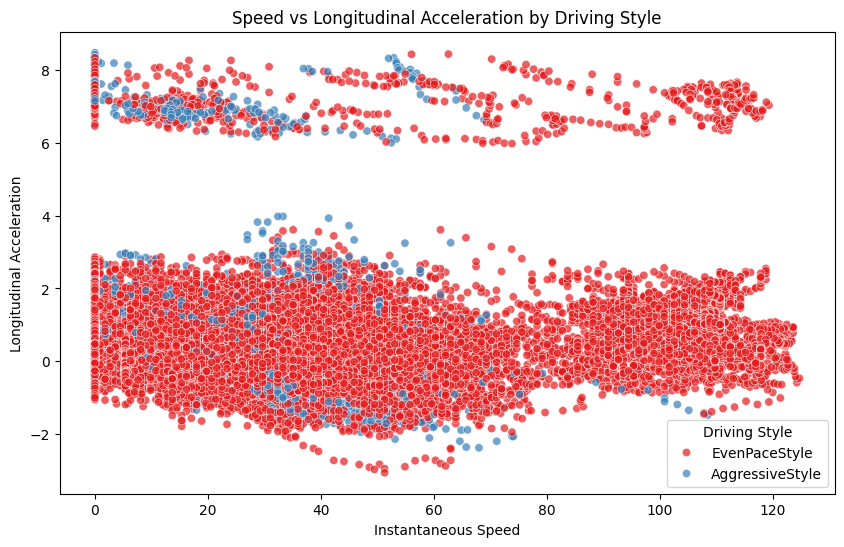

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='VehicleSpeedInstantaneous',
    y='LongitudinalAcceleration',
    hue='drivingStyle',
    palette='Set1',
    alpha=0.7
)
plt.title('Speed vs Longitudinal Acceleration by Driving Style')
plt.xlabel('Instantaneous Speed')
plt.ylabel('Longitudinal Acceleration')
plt.legend(title='Driving Style')
plt.show()

### Road Surface and Traffic Impact on Driving Style (Countplot)

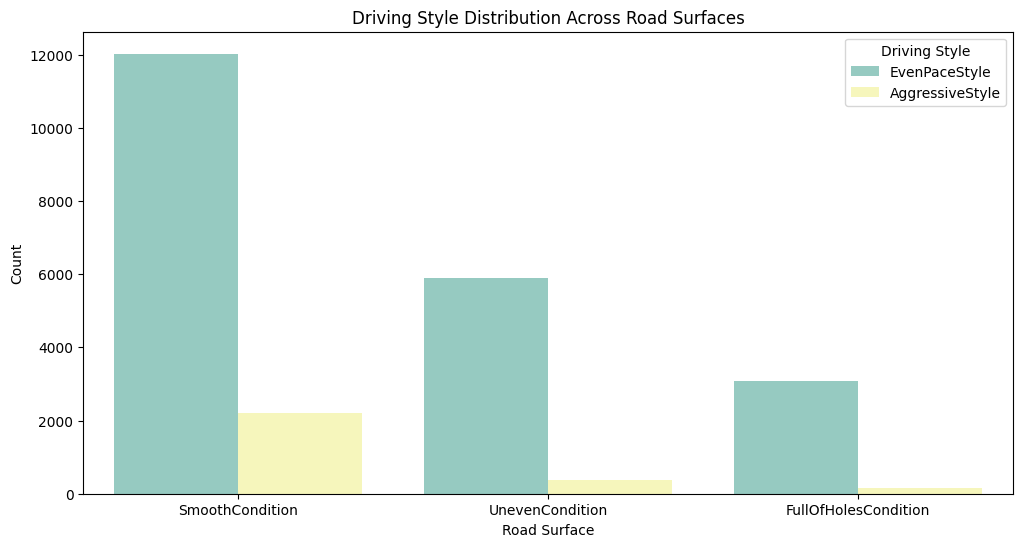

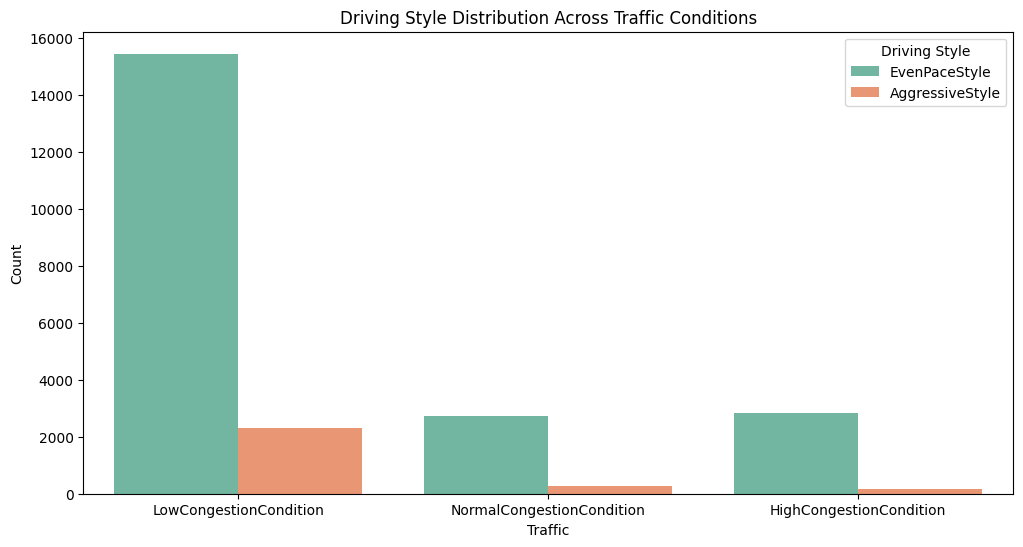

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='roadSurface', hue='drivingStyle', data=df, palette='Set3')
plt.title('Driving Style Distribution Across Road Surfaces')
plt.xlabel('Road Surface')
plt.ylabel('Count')
plt.legend(title='Driving Style')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='traffic', hue='drivingStyle', data=df, palette='Set2')
plt.title('Driving Style Distribution Across Traffic Conditions')
plt.xlabel('Traffic')
plt.ylabel('Count')
plt.legend(title='Driving Style')
plt.show()

# Data Preprocessing

### Choosing a target class

In [18]:
# Importing necessary machine learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [19]:
# dropping unnecessary columns since we are choosing driving style as the target
df.drop(["roadSurface","traffic"],axis= 1,inplace=True)
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,EvenPaceStyle


In [20]:
df.shape

(23775, 15)

Observation: successfully dropped roadSurface and traffic columns. Now dataset has 15 columns instead of 17

In [21]:
# Encoding categorical features
le = LabelEncoder()
df['drivingStyle'] = le.fit_transform(df['drivingStyle'])
# Feature scaling
X = df.drop('drivingStyle', axis=1)
y = df['drivingStyle']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,1


Observation: after the label encoding `EvenPacedStyle` became 1 and `AggressiveStyle` became 0

### Splitting the Data into Training and Testing

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Handling with class imbalance

In [24]:
# Importing  libraries to handle class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

In [25]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({1: 16799, 0: 2221})


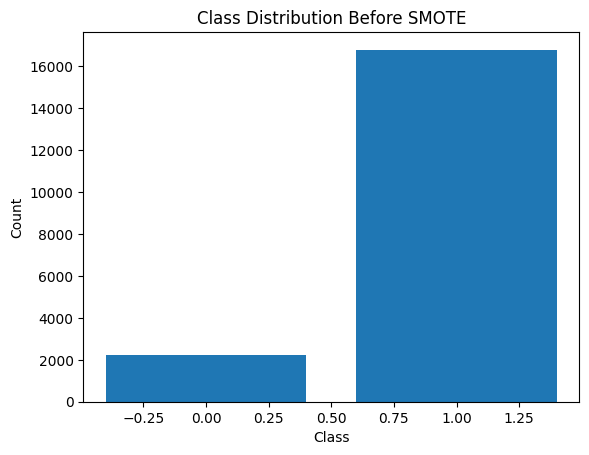

In [26]:
# plotting of class distribution before SMOTE
plt.bar(Counter(y_train).keys(), Counter(y_train).values())
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [27]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [28]:
print("After SMOTE:", Counter(y_train_res))

After SMOTE: Counter({1: 16799, 0: 16799})


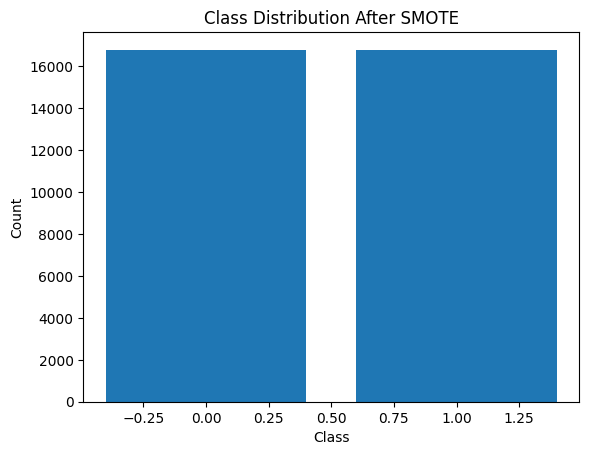

In [29]:
# plotting class distribution after SMOTE
plt.bar(Counter(y_train_res).keys(), Counter(y_train_res).values())
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Training The Models: Decision Tree and Random Forest

In [30]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_res, y_train_res)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_pred = rf_model.predict(X_test)


print("Decision Tree Results:\n", classification_report(y_test, dt_pred))
print("Random Forest Results:\n", classification_report(y_test, rf_pred))

Decision Tree Results:
               precision    recall  f1-score   support

           0       0.55      0.69      0.61       538
           1       0.96      0.93      0.94      4217

    accuracy                           0.90      4755
   macro avg       0.76      0.81      0.78      4755
weighted avg       0.91      0.90      0.91      4755

Random Forest Results:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       538
           1       0.98      0.97      0.97      4217

    accuracy                           0.95      4755
   macro avg       0.88      0.89      0.88      4755
weighted avg       0.95      0.95      0.95      4755



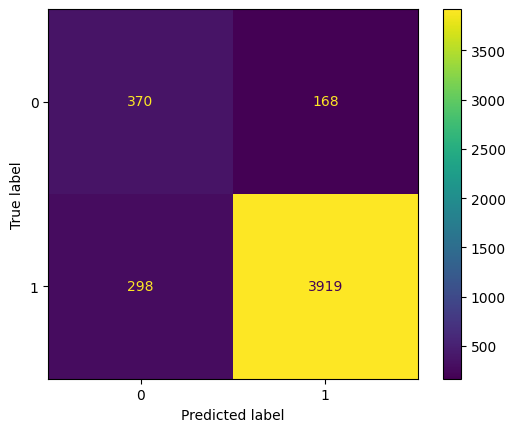

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)

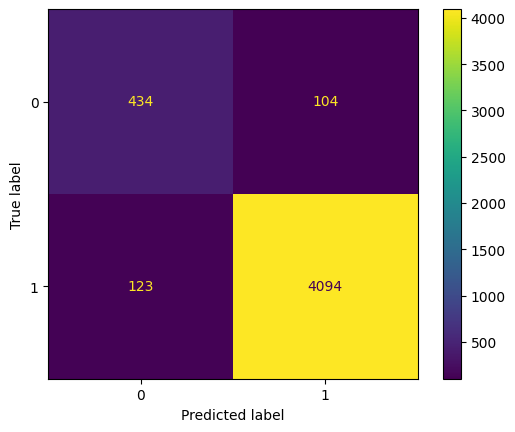

In [32]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)

### Observation

- After applying **SMOTE** to handle class imbalance, both models showed improved performance, especially for the minority class (`AggressiveStyle = 0`).
- The **Decision Tree model** achieved an overall accuracy of **90%**, with a recall of **0.69** and precision of **0.56** for the minority class. This indicates it can detect aggressive driving styles reasonably well but still makes some false positive predictions.
- The **Random Forest model** outperformed the Decision Tree, achieving an accuracy of **95%**. It demonstrated a strong balance between both classes, with a recall of **0.81** and precision of **0.78** for `AggressiveStyle (0)`, and very high scores for `EvenPacedStyle (1)` (recall = 0.97, precision = 0.98).
- The **macro average F1-score** for Random Forest (**0.78**) confirms that the model performs consistently across both classes, unlike before balancing where the majority class dominated predictions.
- Overall, **Random Forest** proved to be the most effective and robust model, capable of accurately distinguishing between *Aggressive* and *Even-Paced* driving styles after addressing class imbalance.

### Feature Importance for Random Forest Model

In [33]:
# sorting values by their contribution to the resulting model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df.head(10))

                      Feature  Importance
1   VehicleSpeedInstantaneous    0.130299
3        VehicleSpeedVariance    0.099262
2         VehicleSpeedAverage    0.092647
13     FuelConsumptionAverage    0.077990
7    EngineCoolantTemperature    0.077133
11       IntakeAirTemperature    0.069103
5    LongitudinalAcceleration    0.067683
8    ManifoldAbsolutePressure    0.066337
12       VerticalAcceleration    0.065983
9                   EngineRPM    0.061252


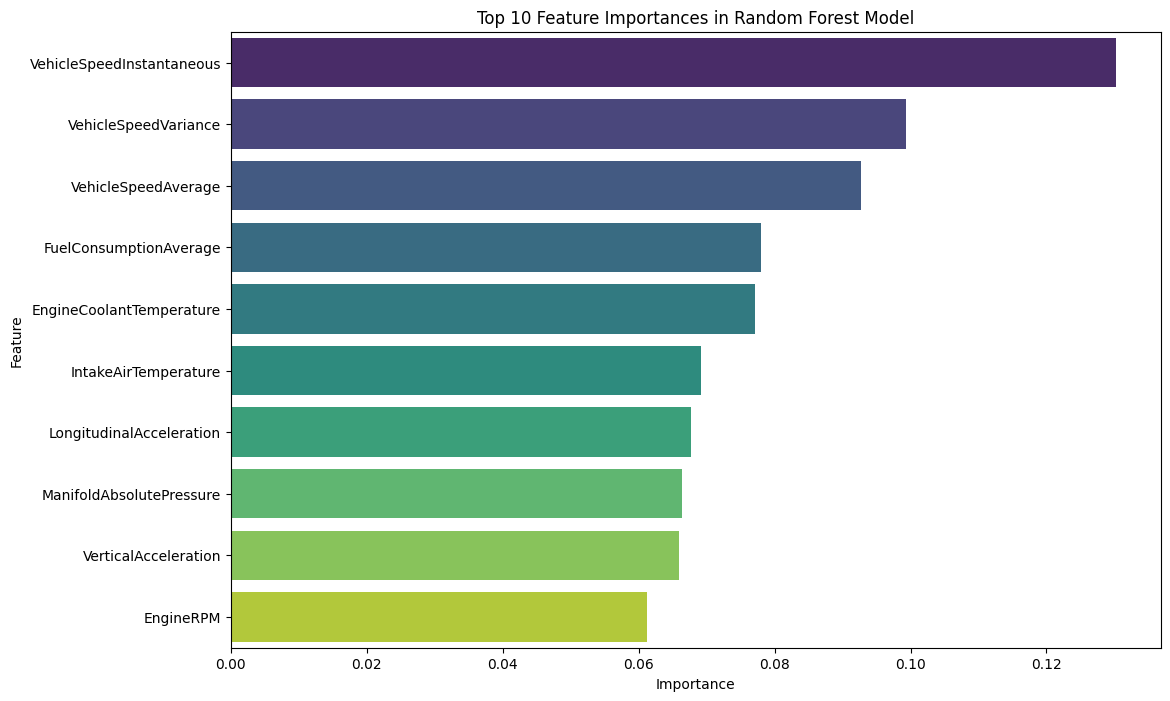

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances_df.head(10),
    hue='Feature',        
    palette='viridis',
    legend=False          
)
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()